In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import regression as reg
import matplotlib.pyplot as plt

In [2]:
def load_data():
    df = pd.read_csv('../data/input/kc_house_data_cleaned.csv')

    X = df[df.columns[range(16)]].to_numpy()
    one = np.ones((X.shape[0], 1))
    X = np.concatenate((one, X), axis=1)
    y = df['price'].to_numpy()
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))
    y = y/1e6
    y = y.reshape((X.shape[0], 1))

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = load_data()
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_train: {y_test.shape}')

X_train: (17277, 17), y_train: (17277, 1)
X_test: (4320, 17), y_train: (4320, 1)


In [4]:
import matplotlib.pyplot as plt

def plot_data(lm: reg.RegressionOpt):
    plt.plot(range(len(lm.loss_func_list)), lm.loss_func_list)
    plt.title(f'Loss function', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

    plt.plot(range(len(lm.grad_norm_list)), lm.grad_norm_list)
    plt.title(f'Gradient norm', fontsize=16)
    plt.ylabel('Value', fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.show()

In [5]:
def save_data(lm: reg.RegressionOpt):
    d = {
        'loss_func_list': lm.loss_func_list,
        'grad_norm_list': lm.grad_norm_list
    }

    df = pd.DataFrame(data=d)

    file_name = 'lf_n_grn_' + str(lm.solver) + '_' + str(lm.step_size) + '.csv'
    df.to_csv('../data/output/' + file_name, index=False)

In [6]:
w_init = np.repeat(0, X_train.shape[1]).reshape((X_train.shape[1], 1))

GD method

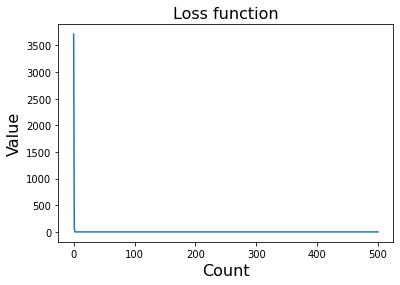

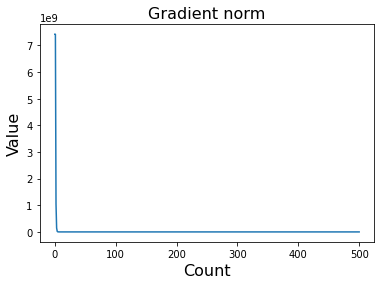

count: 500, gradient norm: 9.538231946597232e-07


In [7]:
lm = reg.RegressionOpt(
    solver='gd',
    max_iter=500,
    w=w_init,
    step_size=2e-12,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=False
)

lm.setup()

w = lm.fit_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}')

Newton method

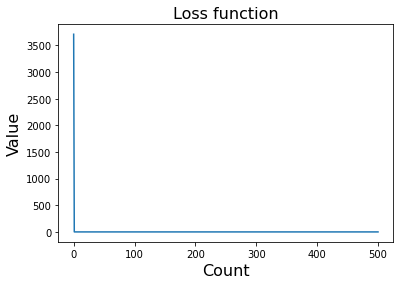

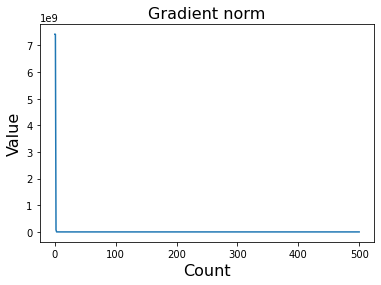

count: 500, gradient norm: 9.53674316406773e-07


In [8]:
lm = reg.RegressionOpt(
    solver='newton',
    max_iter=500,
    step_size=0.99,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=False
)

lm.setup()

lm.fit_newton()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)
save_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}')

Accelerated GD method

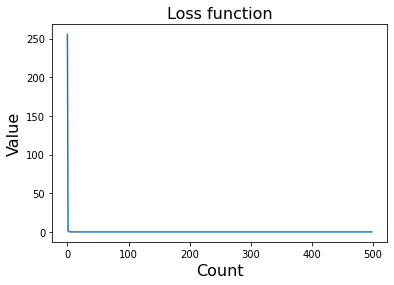

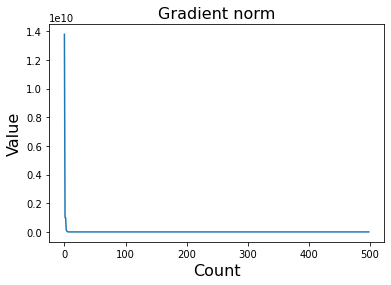

count: 500, gradient norm: 9.538232388254818e-07


In [9]:
import regression as reg

lm = reg.RegressionOpt(
    max_iter=500,
    step_size=2e-12,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=False
)

lm.fit_acc_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}')

GD with backtracking

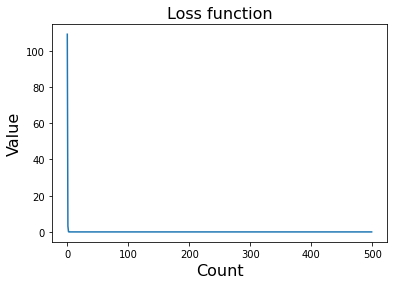

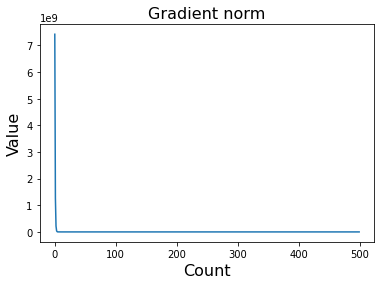

count: 500, inner_count: 500, gradient norm: 3.814734463111447e-06


In [10]:
import regression as reg

lm = reg.RegressionOpt(
    backtracking=True,
    max_iter=500,
    step_size=3,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    terminate=False
)

lm.fit_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

print(f'count: {lm.count}, inner_count: {lm.inner_count}, gradient norm: {lm.grad_norm_list[-1]}')

Accelerated GD with backtracking

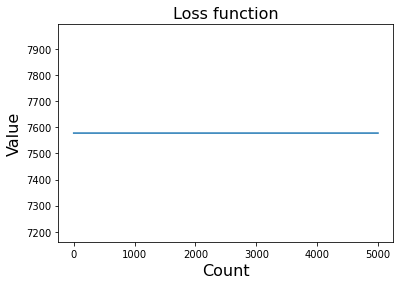

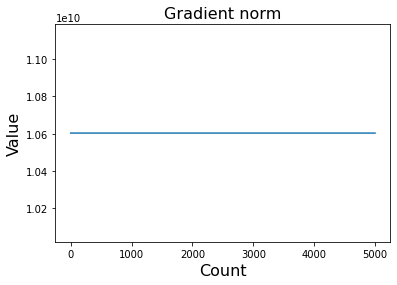

count: 5000, gradient norm: 10603481429.433218


In [11]:
import regression as reg

lm = reg.RegressionOpt(
    backtracking=True,
    max_iter=5000,
    step_size=1e-12,
    w=w_init,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

lm.fit_acc_gd()

loss_func_list = lm.loss_func_list
grad_norm_list = lm.grad_norm_list

plot_data(lm)

print(f'count: {lm.count}, gradient norm: {lm.grad_norm_list[-1]}')

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_
print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

train score: 1.0
test score: 1.0
